In [17]:
import pandas as pd

In [18]:
df=pd.read_csv("D://pandas//supply_chain.csv")

In [19]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [20]:
import plotly.express as px#it is used in grid express 

In [21]:
import plotly.io as pio
import plotly.graph_objects as go#it is used as graphical objects 
pio.templates.default='plotly_white'

In [16]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [9]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
# lets started anylisis the supply chain by looking at the relationship between price of the product and the revenue generated nby them

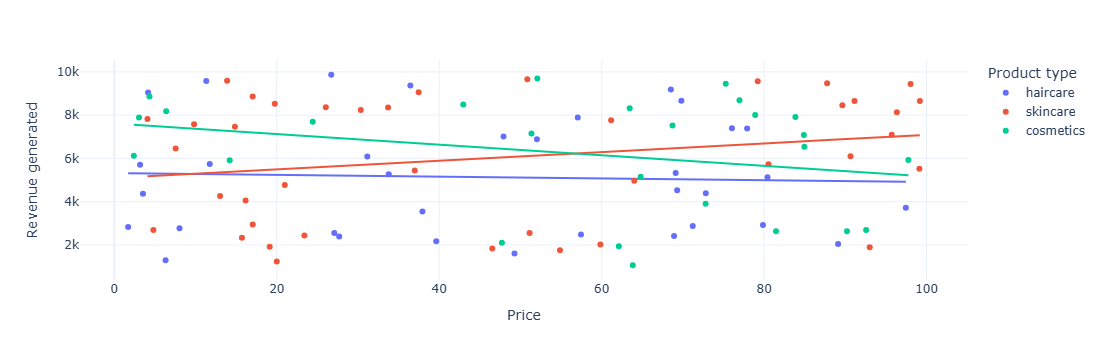

In [15]:
fig=px.scatter( df, x='Price',
               y='Revenue generated',
               color='Product type',
               hover_data=['Number of products sold'],
               trendline='ols')
fig.show()

In [17]:
# thus the company derives more revenue from skincare products and the higher the
# proce of skincare products the more revenue they generate now lets have a look at the sales by product tyoe

In [19]:
sales_df=df.groupby('Product type')['Number of products sold'].sum()
sales_df

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64

In [20]:
sales_df=df.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_df

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


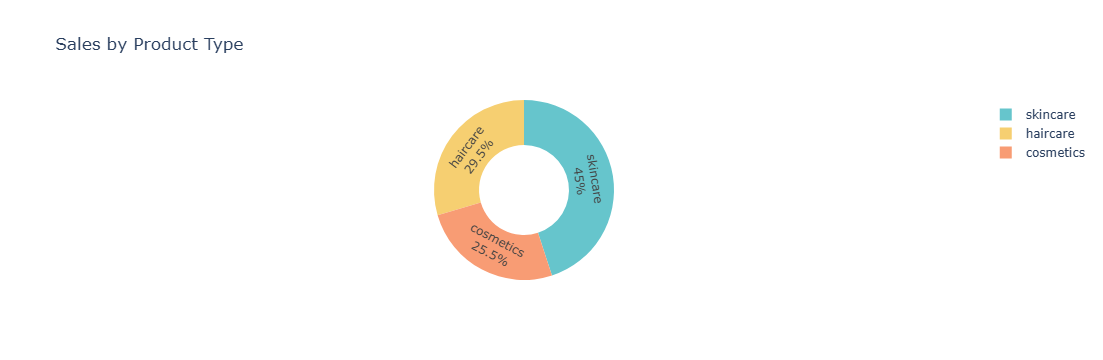

In [28]:
pie_chart=px.pie(sales_df, values='Number of products sold',
                names='Product type',
                title='Sales by Product Type',
                hover_data=['Number of products sold'],
                hole=0.5,
                color_discrete_sequence=px.colors.qualitative.Pastel
                )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [30]:
total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


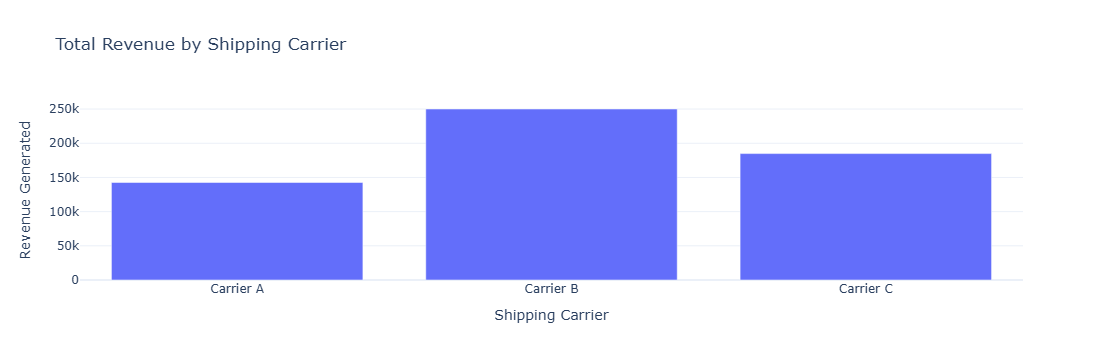

In [39]:
total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig=go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
                  xaxis_title='Shipping Carrier',
                  yaxis_title='Revenue Generated')
fig.show()

In [35]:
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


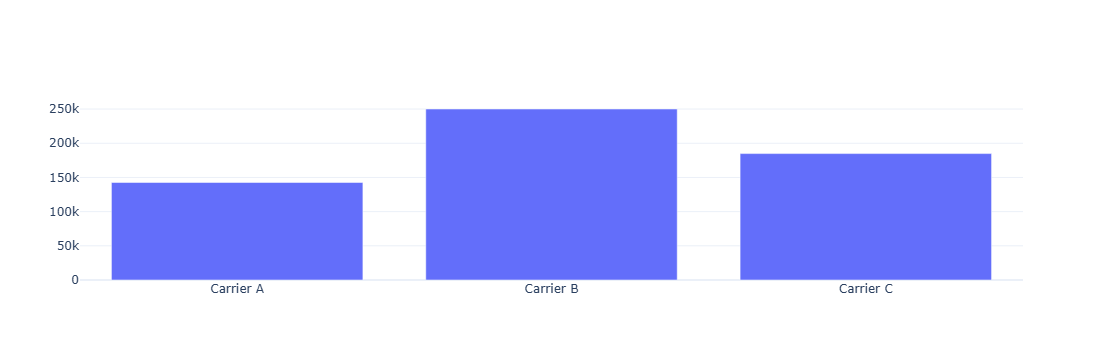

In [40]:
fig=go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))

In [42]:
avg_lead_time=df.groupby('Product type')['Lead time'].mean().reset_index()
avg_lead_time

,Product type,Lead time
0,cosmetics,13.538462
1,haircare,18.705882
2,skincare,18.000000


In [44]:
avg_manu_costs=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
avg_manu_costs

,Product type,Manufacturing costs
0,cosmetics,43.052740
1,haircare,48.457993
2,skincare,48.993157


In [46]:
result=pd.merge(avg_lead_time,avg_manu_costs,on='Product type')

In [47]:
result

,Product type,Lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [50]:
result.rename(columns={'Lead time':'average lead time','Manufacturing costs':'average manufacturing costs'},inplace=True)
#implace is used to do permanently modification 

In [52]:
result

,Product type,average lead time,average manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


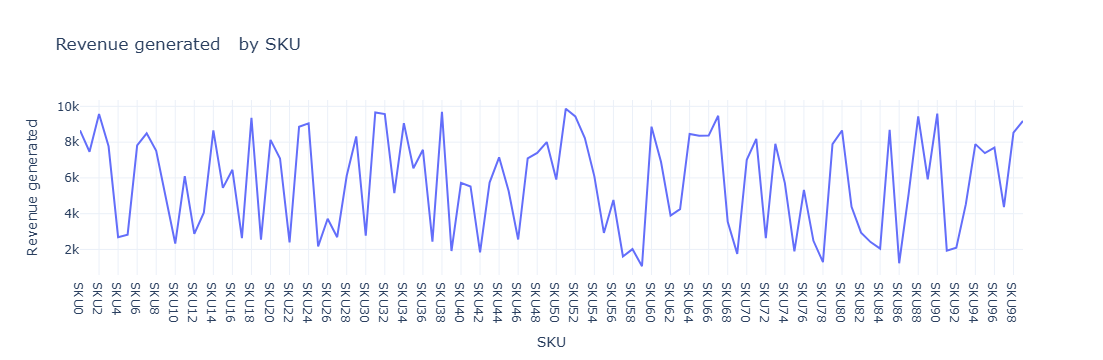

In [15]:
revenue_chart=px.line(df, x='SKU',
                      y='Revenue generated',
                      title='Revenue generated   by SKU',
                      )
revenue_chart.show()

In [25]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


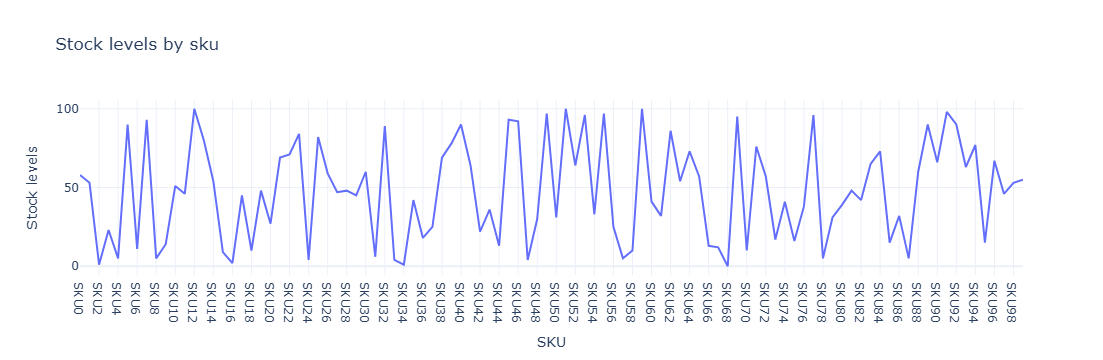

In [26]:
stock_chart=px.line(df,x='SKU',
                    y='Stock levels',
                    title='Stock levels by sku')
stock_chart.show()

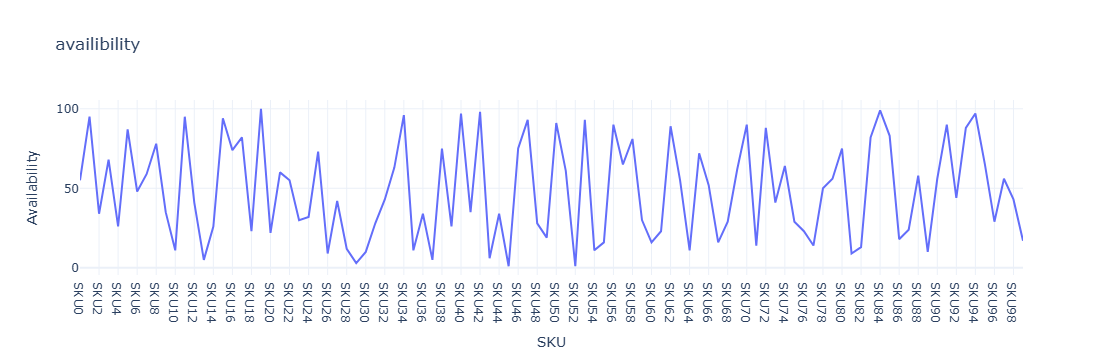

In [27]:
ava=px.line(df,x='SKU',
            y="Availability",
            title="availibility")
ava.show()

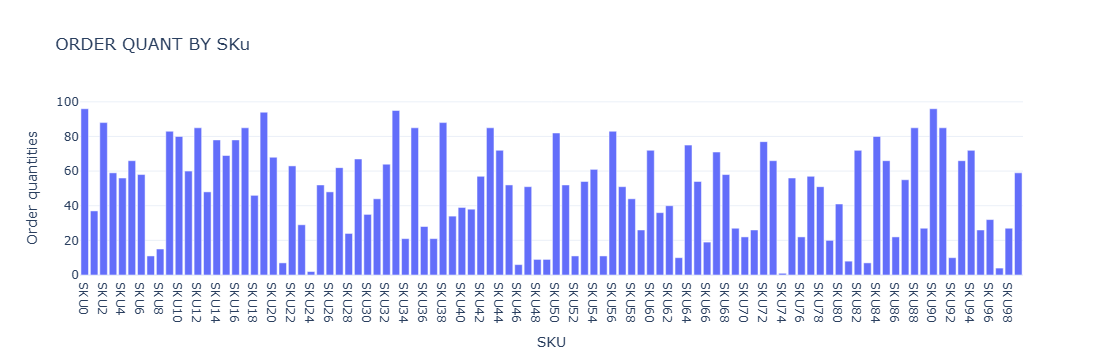

In [30]:
order_quantity=px.bar(df , x='SKU',
                      y="Order quantities",
                      title="ORDER QUANT BY SKu")
order_quantity.show()

In [32]:
df['Customer demographics'].value_counts()

Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

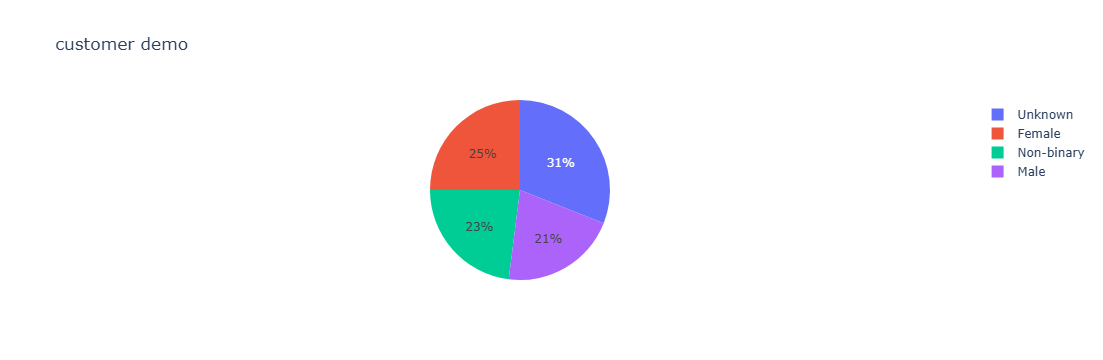

In [63]:
demo=px.pie(df,names='Customer demographics',
            title="customer demo ")
demo.show()

In [35]:
#cost anylysis 

In [40]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

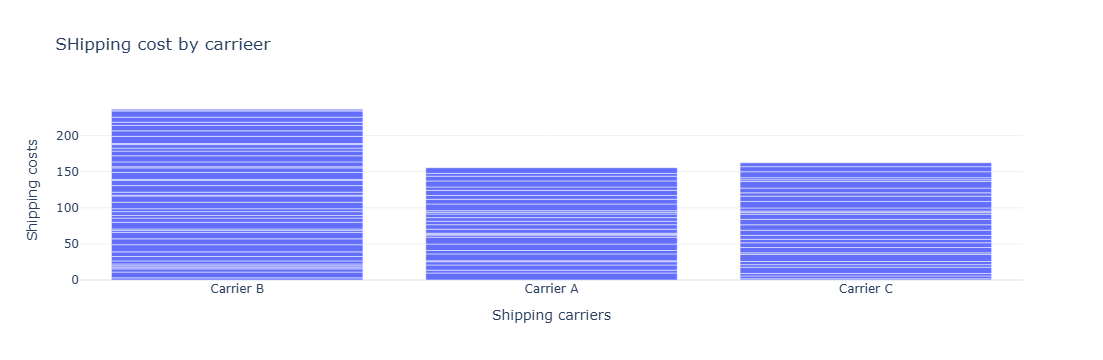

In [37]:
shippingcost=px.bar(df,x='Shipping carriers',
                       y='Shipping costs',
                   title="SHipping cost by carrieer")
shippingcost.show()

In [42]:
#transportation mode visulaix=ze 

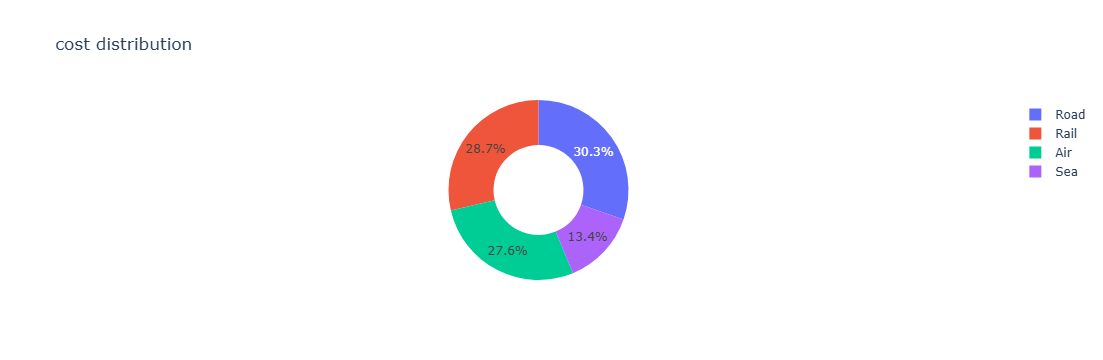

In [54]:
transport=px.pie(df,
                 values='Costs',
                 names ='Transportation modes',
                title='cost distribution ',
                hole=0.5,
                )
transport.show()

In [56]:
df['Transportation modes'].value_counts()

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

In [58]:
#anaylizing  average defect rate by using mean function

In [60]:
defect=df.groupby('Product type')['Defect rates'].mean().reset_index()

In [61]:
defect

,Product type,Defect rates
0,cosmetics,1.919287
1,haircare,2.483150
2,skincare,2.334681


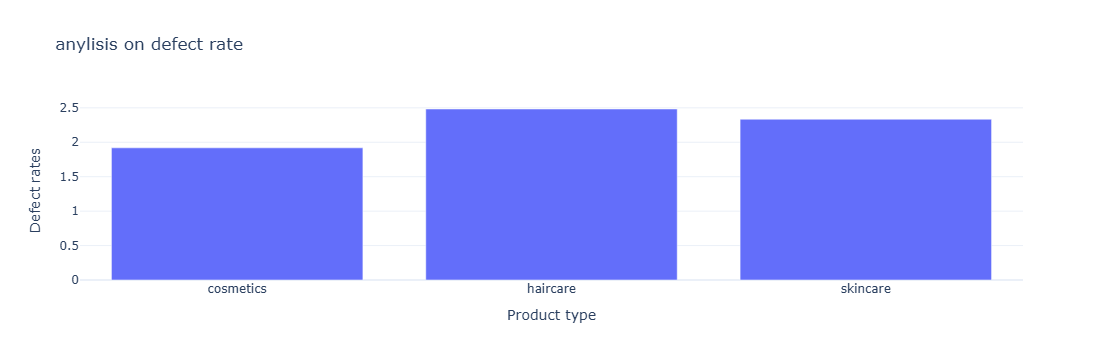

In [62]:
fig=px.bar(defect,x='Product type',
          y='Defect rates',
           title="anylisis on defect rate")
fig.show()

In [ ]:
pivot_table=pd.pivot_table(df,values='Defect rates',
                           index=['Transportation modes'],
                           aggfunc='mean')
transportationchart=px.pie(values=pivot_table)